In [1]:
!pwd

/panda/eedy/chile/s1_a149/mintpy_hight_gim_ion_upsample/geo


view.py geo_velocity.h5 velocity --show-gnss --gnss-comp enu2los -v -2 2 --lalo-label --lalo-step 1 --ylabel-rot 90 --figsize 20 16 --save --noverbose --ref-gnss SOCM --ex-gnss PCHA -m geo_maskTempCoh.h5 --title geo_velocity_SET_ERA5_demErr_ion-hight-GIM


ERROR 1: PROJ: proj_create_from_database: Open of /home/eedy/tools/mambaforge/envs/insar/share/proj failed


create directory: /panda/eedy/chile/s1_a149/mintpy_hight_gim_ion_upsample/geo/GNSS-UNR
downloading site list from UNR: http://geodesy.unr.edu/NGLStationPages/DataHoldings.txt to DataHoldings.txt
load 22003 GNSS sites with fields: site lat lon start_date end_date num_solution
keep sites within SNWE of (-26.526033631102113, -18.399012343245754, -70.3930385583997, -65.9163383506988): [73]
keep sites with end_date >= 20141027: [68]
keep sites with start_date <= 20240320: [68]
keep sites with # of solutions >= 50: [67]
['AEDA' 'AMDE' 'ATJN' 'BDEC' 'BDJC' 'BLOV' 'BMWS' 'BN01' 'BN15' 'BN81'
 'BN91' 'BWSZ' 'CBAA' 'CDLC' 'CGTC' 'CGU2' 'CGUA' 'CHMZ' 'CJNT' 'CLLA'
 'COLC' 'COLO' 'CRIS' 'CRSC' 'CSQM' 'CTLR' 'ELOA' 'FBAQ' 'GTA1' 'HMBS'
 'IAC1' 'IQQE' 'LCEN' 'LLST' 'LVRA' 'MCL1' 'MNMI' 'PATH' 'PB01' 'PB03'
 'PB04' 'PB05' 'PB06' 'PB07' 'PB08' 'PB09' 'PB11' 'PB19' 'PCCL' 'PCHA'
 'PICC' 'PRNL' 'PSGA' 'RAD1' 'RDEO' 'SALC' 'SCTC' 'SOCM' 'SPAT' 'SRGD'
 'SRSA' 'SURI' 'TUZG' 'UAPE' 'UTAR' 'UTUR' 'VLZL']
nea

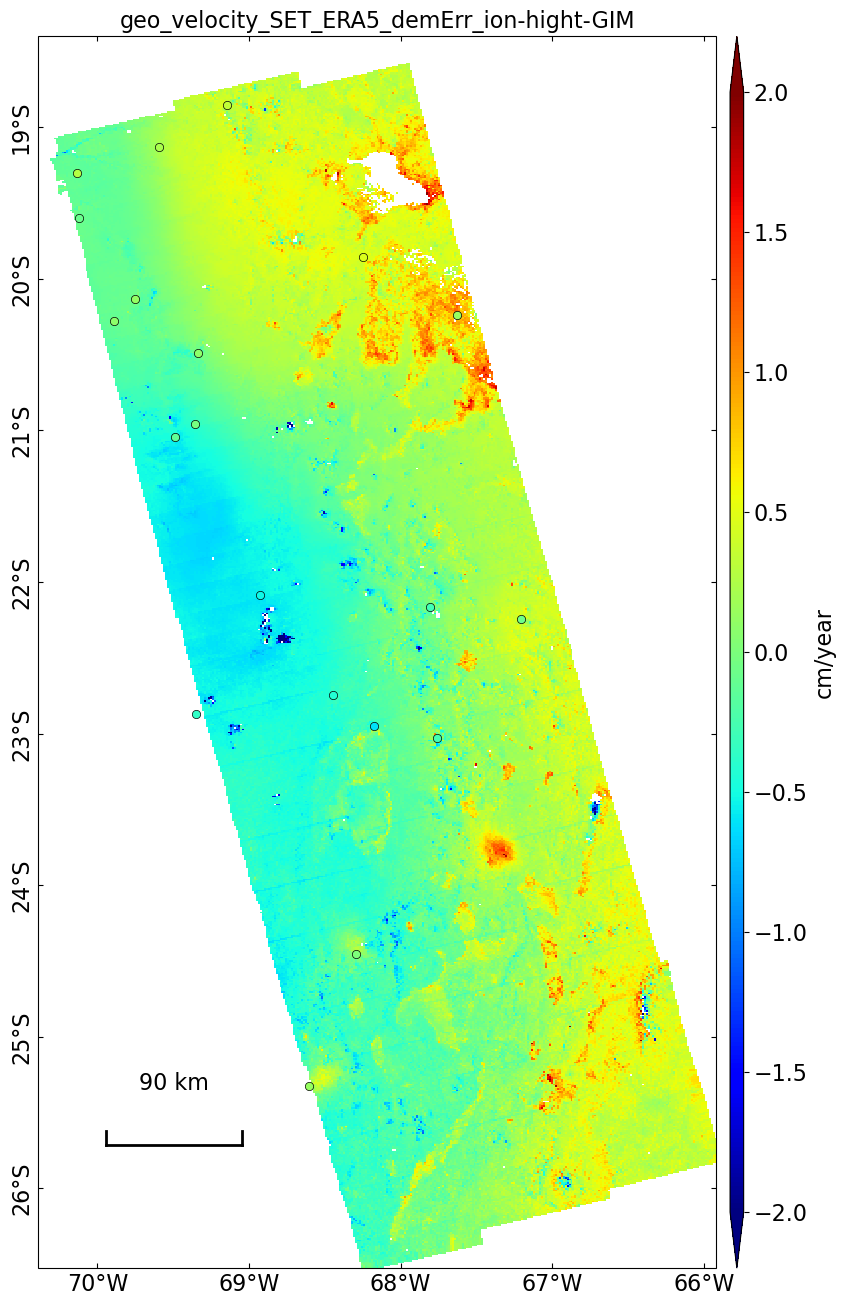

In [2]:
from mintpy.cli import view, tsview, plot_network, plot_transection
opt = '--show-gnss  --gnss-comp enu2los  -v -2 2 --lalo-label --lalo-step 1 --ylabel-rot 90  --figsize 20 16 --save --noverbose --ref-gnss SOCM --ex-gnss PCHA'
view.main(f' geo_velocity.h5 velocity {opt} -m geo_maskTempCoh.h5 --title geo_velocity_SET_ERA5_demErr_ion-hight-GIM'.split())

read GNSS velocity from file: gnss_enu2los_UNR.csv
read InSAR velocity from file: geo_velocity.h5
[==================================================] 66/66 VLZL    0s /     0s 
median offset between InSAR and GNSS [before common referencing]: 0.72 cm/year
referencing both InSAR and GNSS data to site: SOCM
removing sites with NaN values in GNSS or InSAR
pruning sites with value range: [-0.8, 1.2] cm/yr
GNSS   min/max: -0.62 / 0.47
InSAR min/max: -0.60 / 0.99
RMSE = 0.35 cm/yr
R^2 = 0.52
Preliminary outliers detection: abs(InSAR - GNSS) > med abs dev (0.30) * 5
Site:  InSAR  GNSS
save figure to file insar_vs_gnss_scatter.pdf


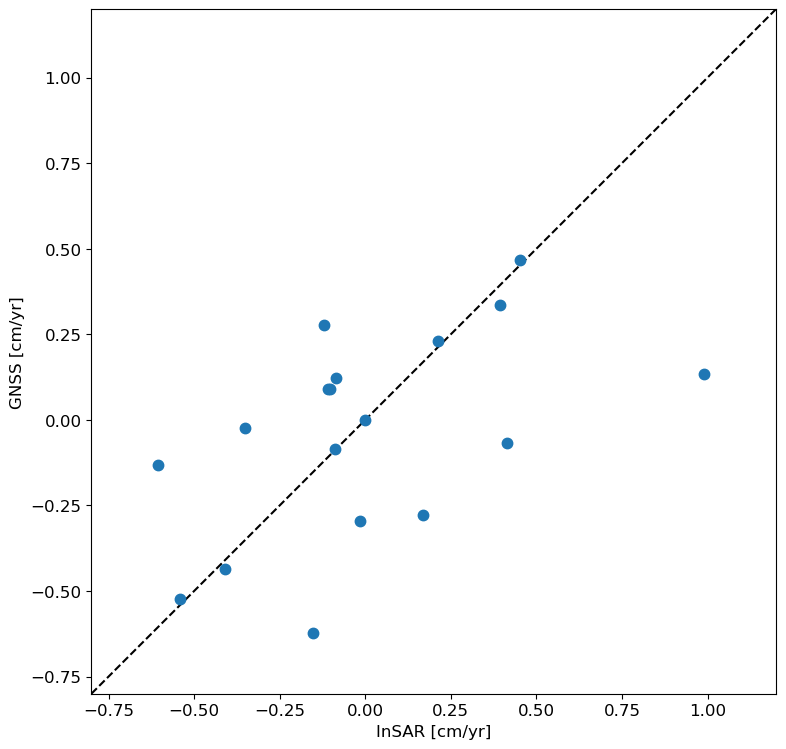

In [5]:
from mintpy.utils import readfile, utils as ut, plot as pp
kwargs = dict(ref_gnss_site='SOCM', csv_file='gnss_enu2los_UNR.csv',msk_file='geo_maskTempCoh.h5' , fig_size = (8,8) ,vlim = [-0.8 , 1.2])
kwargs['ex_gnss_sites'] = ['PCHA']
sites, insar_obs, gnss_obs = pp.plot_insar_vs_gnss_scatter(vel_file='geo_velocity.h5', **kwargs)